In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT BANGKIT/v0.1  intg clean data.csv')


In [8]:
# Display the first 10 rows of the DataFrame
df.head(10)

,Label,Ingredients
0,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,1,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,1,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."
5,1,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl..."
6,1,"Water, Glycerin, Caprylic/ Capric Triglyceride..."
7,1,100% Unrefined Sclerocraya Birrea (Marula) Ker...
8,1,"Water, Glycerin, Cyclohexasiloxane, Squalane, ..."
9,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."


In [9]:
import re

def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  
  text = re.sub(r'@[A-Za-z]+', '', text)        
  text = re.sub(r'@[-)]+', '', text)            
  text = re.sub(r'#', '', text )                
  text = re.sub(r'RT[\s]+', '', text)           
  text = re.sub(r'https?\/\/\S+', '', text)     
  text = re.sub(r'&[a-z;]+', '', text)          

  return text

In [10]:
# Apply text cleaning function to the 'Ingredients' column
df['Ingredients'] = df['Ingredients'].apply(text_cleaning)

# Display the first 10 rows of the DataFrame
df.head(10)

,Label,Ingredients
0,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,1,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,1,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."
5,1,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl..."
6,1,"Water, Glycerin, Caprylic/ Capric Triglyceride..."
7,1,100% Unrefined Sclerocraya Birrea (Marula) Ker...
8,1,"Water, Glycerin, Cyclohexasiloxane, Squalane, ..."
9,1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."


**Training Data**

In [11]:
from sklearn.model_selection import train_test_split

# Split the 'Ingredients' column and 'Label' column into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['Ingredients'].values, df['Label'].values, test_size=0.30)


In [12]:
# Print the 'Ingredients' value of the first training example
print('Ingredients:', x_train[0])

# Print the 'Label' value of the first training example
print('sentiment:', y_train[0])

Ingredients: Raspberry Oil
sentiment: 1


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [14]:
# Set the maximum vocabulary size
max_vocab = 20000000

# Initialize a tokenizer object
tokenizer = Tokenizer(num_words=max_vocab)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(x_train)

In [15]:
# Retrieve the word index from the tokenizer
wordidx = tokenizer.word_index

# Determine the size of the dataset's vocabulary
V = len(wordidx)

print('The size of the dataset vocabulary is:', V)


The size of the dataset vocabulary is: 2016


In [16]:
# Convert text data in x_train to sequences
train_seq = tokenizer.texts_to_sequences(x_train)

# Convert text data in x_test to sequences
test_seq = tokenizer.texts_to_sequences(x_test)

print('Training sequence:', train_seq[0])
print('Testing sequence:', test_seq[0])


Training sequence: [225, 2]
Testing sequence: [13, 158]


In [17]:
# Pad the training sequences
pad_train = pad_sequences(train_seq)

# Determine the length of the padded training sequences
T = pad_train.shape[1]

print('The length of the training sequence is:', T)

The length of the training sequence is: 611


In [18]:
# Pad the testing squences
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  611


**Building Model**

In [19]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [20]:
D = 20 
M = 15

In [21]:
# Define the input layer with shape (T,)
i = Input(shape=(T,))

# Embedding layer: maps each word index to a dense vector representation
x = Embedding(V+1, D)(i)  
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)


In [22]:
model = Model(i,x)


In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 611)]             0         
                                                                 
 embedding (Embedding)       (None, 611, 20)           40340     
                                                                 
 lstm (LSTM)                 (None, 611, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [24]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [25]:
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=10)

Epoch 1/10
17/17 [==============================] - 10s 436ms/step - loss: 0.6929 - accuracy: 0.5360 - val_loss: 0.6918 - val_accuracy: 0.5733
Epoch 2/10
17/17 [==============================] - 5s 290ms/step - loss: 0.6899 - accuracy: 0.6969 - val_loss: 0.6882 - val_accuracy: 0.8060
Epoch 3/10
17/17 [==============================] - 5s 286ms/step - loss: 0.6838 - accuracy: 0.8928 - val_loss: 0.6802 - val_accuracy: 0.8319
Epoch 4/10
17/17 [==============================] - 6s 373ms/step - loss: 0.6690 - accuracy: 0.8965 - val_loss: 0.6643 - val_accuracy: 0.7974
Epoch 5/10
17/17 [==============================] - 5s 296ms/step - loss: 0.6326 - accuracy: 0.8725 - val_loss: 0.5998 - val_accuracy: 0.8362
Epoch 6/10
17/17 [==============================] - 6s 352ms/step - loss: 0.5485 - accuracy: 0.8244 - val_loss: 0.5316 - val_accuracy: 0.8664
Epoch 7/10
17/17 [==============================] - 5s 310ms/step - loss: 0.4694 - accuracy: 0.8669 - val_loss: 0.4996 - val_accuracy: 0.9181
Epoch

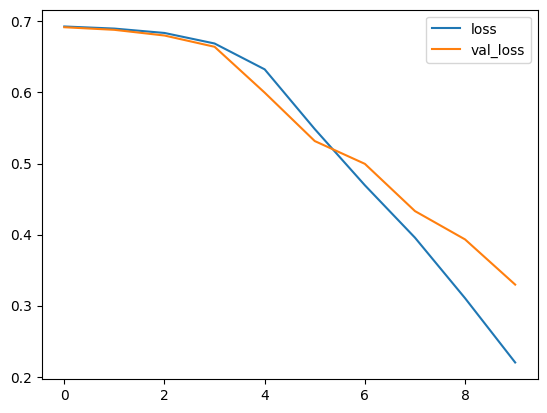

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

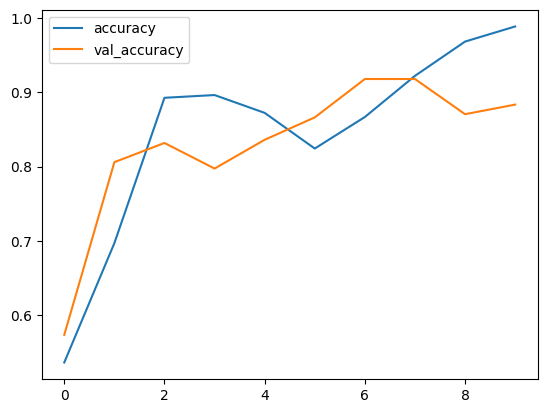

In [27]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

**Predict Sentiment**

In [28]:
def predict_sentiment(text):
  # Convert the text to sequences using the tokenizer
  text_seq = tokenizer.texts_to_sequences(text)
  
  # Pad the sequences
  text_pad = pad_sequences(text_seq, maxlen=T)

  # Predict the sentiment using the trained model
  predicted_sentiment = model.predict(text_pad).round()

  # Check the predicted sentiment and return the corresponding label
  if predicted_sentiment == 1.0:
    return print('It is a positive sentiment')
  else:
    return print('It is a negative sentiment')

# Example text
text = ['KOMPOSISI: Water, Triethanolamine, Myristic Acid, Lauric\nAcid, Glycerin, Lauryl Phosphate, Hydroxypropyl\nMethylcellulose, Cocamidopropyl Betaine, Phenoxyethanol,\nFragrance, Methylparaben, BHT, Propylparaben,\no-Cymen-5-ol, Ethylparaben, Benzophenone-4.']
predict_sentiment(text)

1/1 [==============================] - 1s 874ms/step
It is a positive sentiment


In [30]:
model.save('funne_sentiment_analysis.v.01')

In [32]:
model.save('funne_sentiment_analysis.v.01.h5')